In [ ]:
!pip install feature-engine
#libraries we are going to use
import numpy as np # linear algebra
import pandas as pd # data processing
import pandas_profiling as pp
import plotly.express as px #visualization
from plotly.subplots import make_subplots #visualization
import matplotlib.pyplot as plt#visualization
import seaborn as sns #visualization
import plotly.graph_objects as go #visualization
# from colorama import Fore, Back, Style #change strings color 
from sklearn.model_selection import train_test_split #split data
from feature_engine.selection import SelectBySingleFeaturePerformance #feature selection
from sklearn.metrics import confusion_matrix #confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve #metrics
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score #metrics
from sklearn.model_selection import cross_val_score #cross validation
from sklearn.model_selection import KFold #cross validation by kfold
from sklearn.model_selection import GridSearchCV #find best parameter 
from sklearn.ensemble import RandomForestClassifier #ML model
from sklearn.linear_model import LogisticRegression #ML model
from sklearn.ensemble import AdaBoostClassifier #ML model
from xgboost import XGBClassifier #ML model
from sklearn.tree import DecisionTreeClassifier #ML model
from imblearn.over_sampling import SMOTE #oversample data
from sklearn import preprocessing #label encoding

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
# import scikitplot as skplt

from imblearn.over_sampling import RandomOverSampler

In [ ]:
Train=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
Train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
Train.replace(to_replace="Urban", value=1, inplace=True)
Train.replace(to_replace="Rural", value=0, inplace=True)

Train.replace(to_replace="Yes", value=1, inplace=True)
Train.replace(to_replace="No", value=0, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
Train = pd.DataFrame(imputer.fit_transform(Train), columns=Train.columns, index=Train.id)
Train = Train.reset_index(drop=True)

In [ ]:
Train.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5110 non-null   object
 1   gender             5110 non-null   object
 2   age                5110 non-null   object
 3   hypertension       5110 non-null   object
 4   heart_disease      5110 non-null   object
 5   ever_married       5110 non-null   object
 6   work_type          5110 non-null   object
 7   Residence_type     5110 non-null   object
 8   avg_glucose_level  5110 non-null   object
 9   bmi                5110 non-null   object
 10  smoking_status     5110 non-null   object
 11  stroke             5110 non-null   object
dtypes: object(12)
memory usage: 479.2+ KB


In [ ]:
Train = pd.get_dummies(Train, columns=['work_type', 'smoking_status', 'gender'])
Train.drop(columns=['id'], inplace=True)
Train.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other
0,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0,0,1,0
1,61.0,0,0,1,0,202.21,28.7,1,0,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0,0,1,0
3,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1,1,0,0
4,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0,1,0,0


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   age                             5110 non-null   object
 1   hypertension                    5110 non-null   object
 2   heart_disease                   5110 non-null   object
 3   ever_married                    5110 non-null   object
 4   Residence_type                  5110 non-null   object
 5   avg_glucose_level               5110 non-null   object
 6   bmi                             5110 non-null   object
 7   stroke                          5110 non-null   object
 8   work_type_Govt_job              5110 non-null   uint8 
 9   work_type_Never_worked          5110 non-null   uint8 
 10  work_type_Private               5110 non-null   uint8 
 11  work_type_Self-employed         5110 non-null   uint8 
 12  work_type_children              5110 non-null   

In [ ]:
yData = Train.pop('stroke').to_numpy()
xData = Train.to_numpy()

xData = xData.astype(np.float32)
yData = yData.astype(np.float32)
xData.shape, yData.shape

((5110, 19), (5110,))

In [ ]:
xData.shape, yData.shape

((5110, 19), (5110,))

Logstic regression model test 

When train data is 70%

In [ ]:
SPLIT = int(0.70*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test = xData[SPLIT:]
y_test = yData[SPLIT:]

In [ ]:
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR = LRclassifier.predict(x_test)

In [ ]:
LRAcc = accuracy_score(y_pred_LR, y_test)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc*100)+' .:.')

.:. Logistic Regression Accuracy: 99.87% .:.


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_LR)
x1=(np.sqrt(mse))
print(x1)

0.03611968


In [ ]:
%matplotlib inline

[[1531    2]
 [   0    0]]


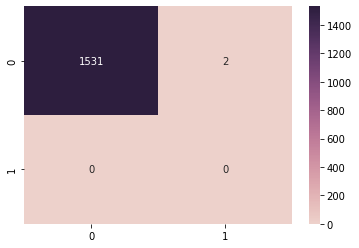

In [ ]:
cf_matrix = confusion_matrix(y_test,y_pred_LR)
print(cf_matrix)
# plt.figure()
# cf_matrix = confusion_matrix(y_test,y_pred_LR ))
# plt.title('Confusion Matrix: {}'.format(name))
ss =  sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

when training data is 40%

In [ ]:
SPLIT = int(0.40*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test1 = xData[SPLIT:]
y_test1 = yData[SPLIT:]

In [ ]:
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR1= LRclassifier.predict(x_test1)

In [ ]:
LRAcc1 = accuracy_score(y_pred_LR1, y_test1)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc1*100)+' .:.')

.:. Logistic Regression Accuracy: 98.11% .:.


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test1,y_pred_LR1)
x2=(np.sqrt(mse))
print(x2)

0.13753965


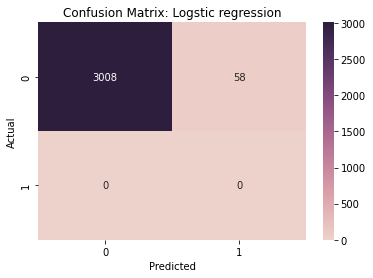

In [ ]:
cf_matrix = confusion_matrix(y_test1, y_pred_LR1)
plt.title('Confusion Matrix: {}'.format("Logstic regression"))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

when training data is 20%

In [ ]:
SPLIT = int(0.20*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test2 = xData[SPLIT:]
y_test2 = yData[SPLIT:]

In [ ]:
LRclassifier = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassifier.fit(x_train, y_train)

y_pred_LR2= LRclassifier.predict(x_test2)

In [ ]:
LRAcc2 = accuracy_score(y_pred_LR2, y_test2)
print('.:. Logistic Regression Accuracy:'+'\033[1m {:.2f}%'.format(LRAcc2*100)+' .:.')

.:. Logistic Regression Accuracy: 89.21% .:.


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test2,y_pred_LR2)
x3=(np.sqrt(mse))
print(x3)

0.3284459


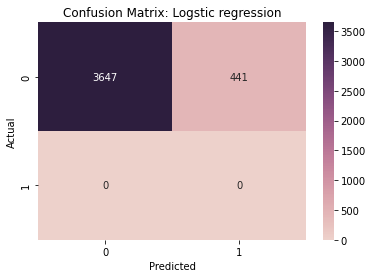

In [ ]:
cf_matrix = confusion_matrix(y_test2, y_pred_LR2)
plt.title('Confusion Matrix: {}'.format("Logstic regression"))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

KNN Model 

When training data is 70%

In [ ]:
SPLIT = int(0.70*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test = xData[SPLIT:]
y_test = yData[SPLIT:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
y_pred_prob_knn = knn.predict_proba(x_test)[:, 1]

# skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_knn))

Accuracy: 0.9915198956294846


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_knn)
x1knn=(np.sqrt(mse))
print(x1knn)

0.092087485


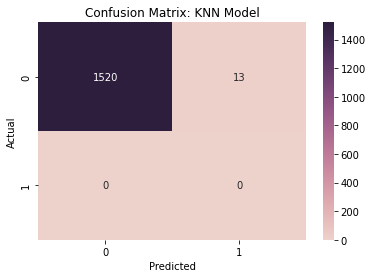

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.title('Confusion Matrix: {}'.format("KNN Model"))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

when training data is 40%

In [ ]:
SPLIT = int(0.40*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test = xData[SPLIT:]
y_test = yData[SPLIT:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)
y_pred_knn1 = knn.predict(x_test)
y_pred_prob_knn = knn.predict_proba(x_test)[:, 1]

# skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_knn1))

Accuracy: 0.9748858447488584


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_knn1)
x2knn=(np.sqrt(mse))
print(x2knn)

0.15847446


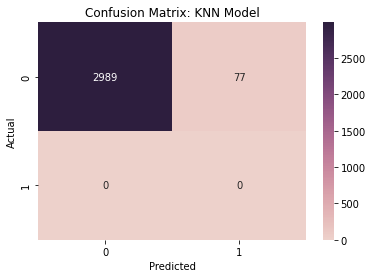

In [ ]:
cf_matrix = confusion_matrix(y_test1, y_pred_knn1)
plt.title('Confusion Matrix: {}'.format("KNN Model"))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

when training data is 20%

In [ ]:
SPLIT = int(0.20*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test = xData[SPLIT:]
y_test = yData[SPLIT:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)
y_pred_knn2 = knn.predict(x_test)
y_pred_prob_knn = knn.predict_proba(x_test)[:, 1]

# skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_knn2))

Accuracy: 0.9222113502935421


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_knn2)
x3knn=(np.sqrt(mse))
print(x3knn)

0.27890617


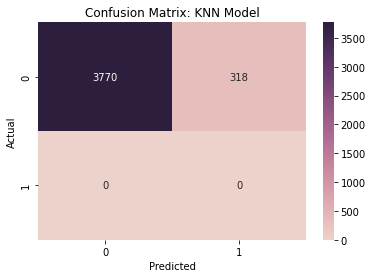

In [ ]:
cf_matrix = confusion_matrix(y_test2, y_pred_knn2)
plt.title('Confusion Matrix: {}'.format("KNN Model"))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Not using support vector machine because the accauary given at 70% is very low. So of no use to us

In [ ]:
SPLIT = int(0.70*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test = xData[SPLIT:]
y_test = yData[SPLIT:]

In [ ]:
from sklearn.svm import SVC
SVMclassifier = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [ ]:
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

.:. Support Vector Machine Accuracy: 25.64% .:.


Model Random forest classifier

when training data is 70%

In [ ]:
SPLIT = int(0.70*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test = xData[SPLIT:]
y_test = yData[SPLIT:]

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF = RFclassifier.predict(x_test)

In [ ]:
RFAcc = accuracy_score(y_pred_RF, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

.:. Random Forest Accuracy: 100.00% .:.


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_RF)
x1=(np.sqrt(mse))
print(x1)

0.0


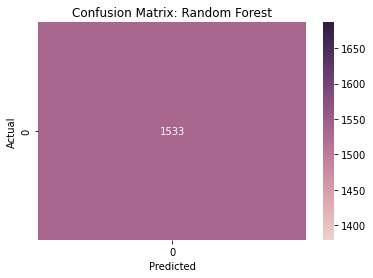

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_RF)
plt.title('Confusion Matrix: {}'.format("Random Forest"))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

when training data is 40%

In [ ]:
SPLIT = int(0.40*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test = xData[SPLIT:]
y_test = yData[SPLIT:]

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF1 = RFclassifier.predict(x_test)

In [ ]:
RFAcc1 = accuracy_score(y_pred_RF1, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc1*100)+' .:.')

.:. Random Forest Accuracy: 99.97% .:.


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_RF1)
x2=(np.sqrt(mse))
print(x2)

0.01805984


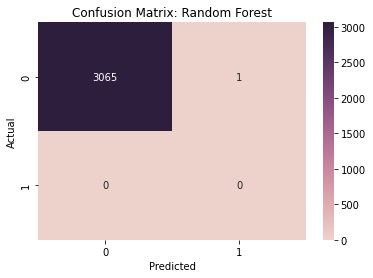

In [ ]:
cf_matrix = confusion_matrix(y_test1, y_pred_RF1)
plt.title('Confusion Matrix: {}'.format("Random Forest"))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

when training data is 20%

In [ ]:
SPLIT = int(0.20*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test = xData[SPLIT:]
y_test = yData[SPLIT:]

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RFclassifier.fit(x_train, y_train)
y_pred_RF2 = RFclassifier.predict(x_test)

In [ ]:
RFAcc2 = accuracy_score(y_pred_RF2, y_test)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc2*100)+' .:.')

.:. Random Forest Accuracy: 93.00% .:.


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_RF2)
x3=(np.sqrt(mse))
print(x3)

0.26450115


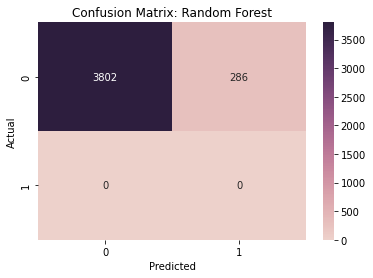

In [ ]:
cf_matrix = confusion_matrix(y_test2, y_pred_RF2)
plt.title('Confusion Matrix: {}'.format("Random Forest"))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

 Gradient boosting classifier

when training data is 70%

In [ ]:
SPLIT = int(0.70*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test = xData[SPLIT:]
y_test = yData[SPLIT:]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB = GBclassifier.predict(x_test)

In [ ]:
GBAcc = accuracy_score(y_pred_GB, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc*100)+' .:.')

.:. Gradient Boosting Accuracy: 100.00% .:.


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_GB)
x1=(np.sqrt(mse))
print(x1)

0.0


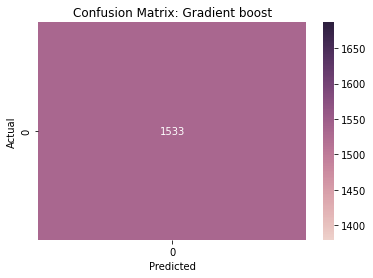

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_GB)
plt.title('Confusion Matrix: {}'.format("Gradient boost"))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

when training data is 40%

In [ ]:
SPLIT = int(0.40*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test = xData[SPLIT:]
y_test = yData[SPLIT:]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB1 = GBclassifier.predict(x_test)

In [ ]:
GBAcc1 = accuracy_score(y_pred_GB1, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc1*100)+' .:.')

.:. Gradient Boosting Accuracy: 98.21% .:.


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_GB1)
x2=(np.sqrt(mse))
print(x2)

0.13393536


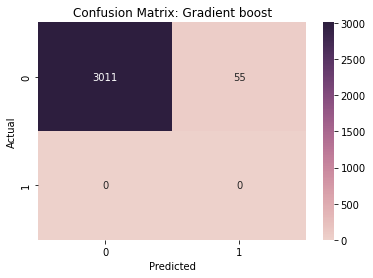

In [ ]:
cf_matrix = confusion_matrix(y_test1, y_pred_GB1)
plt.title('Confusion Matrix: {}'.format("Gradient boost"))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

when training data is 20%

In [ ]:
SPLIT = int(0.20*len(xData))

x_train = xData[:SPLIT]
y_train = yData[:SPLIT]

x_test = xData[SPLIT:]
y_test = yData[SPLIT:]

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBclassifier = GradientBoostingClassifier(random_state=1, n_estimators=100, max_leaf_nodes=3, loss='exponential', 
                                          min_samples_leaf=20)

GBclassifier.fit(x_train, y_train)
y_pred_GB2 = GBclassifier.predict(x_test)

In [ ]:
GBAcc2 = accuracy_score(y_pred_GB2, y_test)
print('.:. Gradient Boosting Accuracy:'+'\033[1m {:.2f}%'.format(GBAcc2*100)+' .:.')

.:. Gradient Boosting Accuracy: 89.75% .:.


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred_GB2)
x3=(np.sqrt(mse))
print(x3)

0.32014856


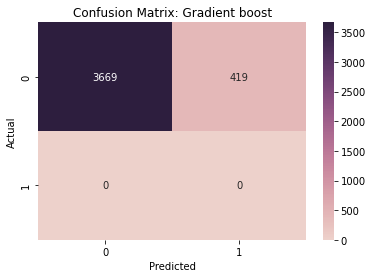

In [ ]:
cf_matrix = confusion_matrix(y_test2, y_pred_GB2)
plt.title('Confusion Matrix: {}'.format("Gradient boost"))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()